Final index frequency: <QuarterEnd: startingMonth=12>
Data points: 29
2018-09-30    7.64
2018-12-31    7.45
2019-03-31    7.52
2019-06-30    7.95
2019-09-30    7.71
Freq: QE-DEC, Name: Revenue, dtype: float64
Using safe lags = 10


<Figure size 800x400 with 0 Axes>

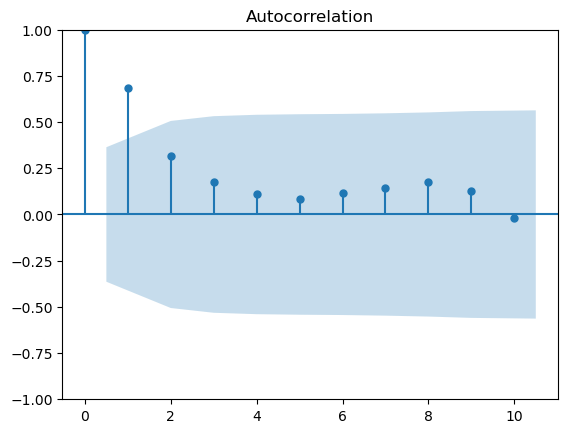

<Figure size 800x400 with 0 Axes>

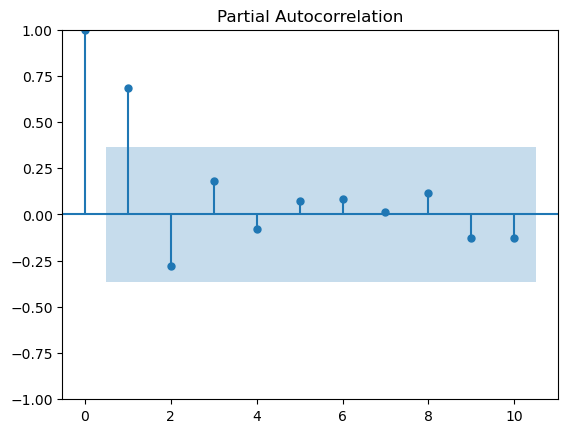

In [5]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Load Data
df = pd.read_csv("D:/revenue data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").set_index("Date")

ts = df.iloc[:,0].astype(float)

# 2. FORCE QUARTERLY INDEX
# ==========================
# Rebuild correct quarterly dates
new_index = pd.date_range(start=ts.index.min(),
                          periods=len(ts),
                          freq="Q")

ts.index = new_index

print("Final index frequency:", ts.index.freq)
print("Data points:", len(ts))
print(ts.head())

# ==========================
# 3. SAFE LAG SELECTION
# ==========================
n = len(ts)
safe_lags = max(1, min(n - 2, 10))     # always safe ∴ no negative dimensions

print("Using safe lags =", safe_lags)

# ==========================
# 4. PLOT ACF/PACF
# ==========================
plt.figure(figsize=(8,4))
plot_acf(ts, lags=safe_lags)
plt.show()

plt.figure(figsize=(8,4))
plot_pacf(ts, lags=safe_lags, method='ywm')
plt.show()


In [11]:
import os
import pandas as pd

# ================================
# 1. LOAD YOUR DATA
# ================================

df = pd.read_csv(r"/mnt/data/revenue data.csv")  # ← your uploaded file
print(df.head())

# ================================
# 2. SET SAFE SAVE LOCATION
# ================================

# Create a guaranteed working folder on D: drive
save_folder = r"D:/forecast_outputs"

# Create the folder if it does NOT exist
os.makedirs(save_folder, exist_ok=True)

# Print confirmation
print("Saving folder exists:", os.path.isdir(save_folder))

# ================================
# 3. LATER IN YOUR SCRIPT → SAVE FORECAST
# ================================
# (Put this at the end of your ARIMA/SARIMA code)

out_df = pd.DataFrame({
    "forecast": mean_forecast,
    "lower_ci": conf_int.iloc[:, 0],
    "upper_ci": conf_int.iloc[:, 1]
})

# Save the output safely
save_path = os.path.join(save_folder, "forecast_output.csv")
out_df.to_csv(save_path, index=False)

print("\nForecast saved to:", save_path)
print(out_df)


         Date  Revenue
0  31-07-2018     7.64
1  31-10-2018     7.45
2  31-01-2019     7.52
3  30-04-2019     7.95
4  31-07-2019     7.71
Saving folder exists: True

Forecast saved to: D:/forecast_outputs\forecast_output.csv
            forecast  lower_ci  upper_ci
2025-12-31  8.758617  8.443951  9.073283
2026-03-31  8.656599  8.162008  9.151190
2026-06-30  8.944653  8.418644  9.470661
2026-09-30  8.889569  8.360905  9.418233
2026-12-31  8.977753  8.354987  9.600520
2027-03-31  8.900083  8.154756  9.645409
2027-06-30  9.196755  8.415754  9.977755
2027-09-30  9.140700  8.350771  9.930629


Save folder: D:/forecast_outputs
Plots folder: D:/forecast_outputs\plots
Using input file: D:/revenue data.csv
Detected target column: Revenue
Raw observations: 29
Forced quarterly index: <QuarterEnd: startingMonth=12>
Series range: 2018-09-30 to 2025-09-30


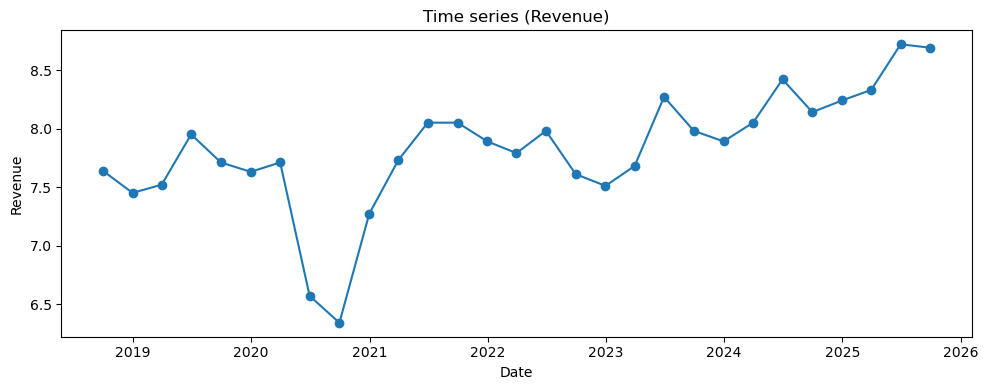

Series plot saved to: D:/forecast_outputs\plots\series_plot.png
Using safe_lags = 10


<Figure size 800x400 with 0 Axes>

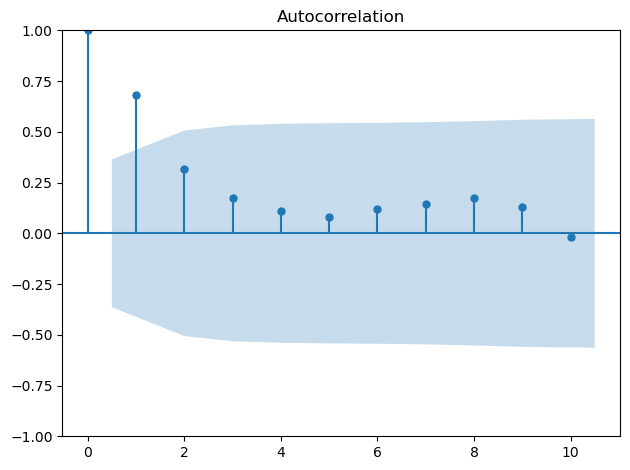

ACF plot saved to: D:/forecast_outputs\plots\acf.png


<Figure size 800x400 with 0 Axes>

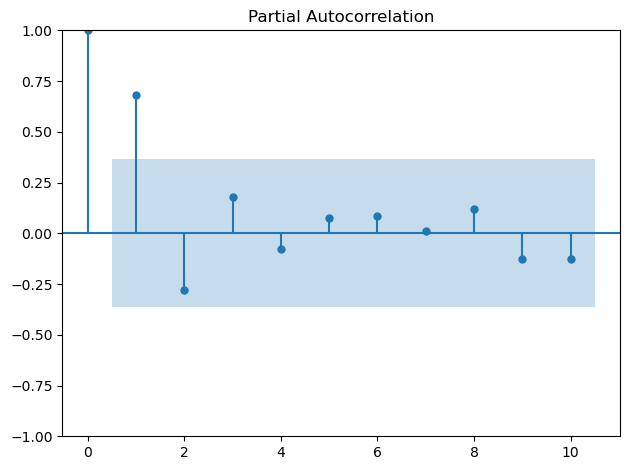

PACF plot saved to: D:/forecast_outputs\plots\pacf.png
ADF statistic: 0.3557, p-value: 0.9798
Starting SARIMA grid search... (this may take a minute)
Best AIC: -1.6252
Best order (p,d,q): (2, 1, 2)
Best seasonal (P,D,Q,m): (0, 1, 1, 4)
                                      SARIMAX Results                                      
Dep. Variable:                             Revenue   No. Observations:                   29
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 4)   Log Likelihood                   6.813
Date:                             Sat, 22 Nov 2025   AIC                             -1.625
Time:                                     20:52:05   BIC                              3.374
Sample:                                 09-30-2018   HQIC                            -1.128
                                      - 09-30-2025                                         
Covariance Type:                               opg                                         
                 coef    std

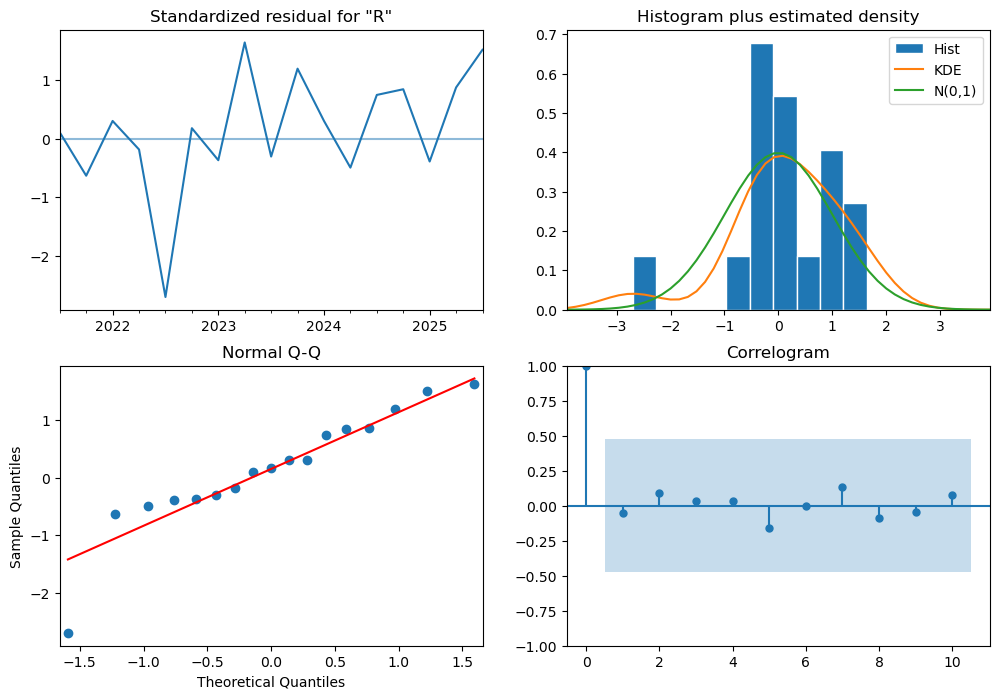

Diagnostics saved to: D:/forecast_outputs\plots\diagnostics.png


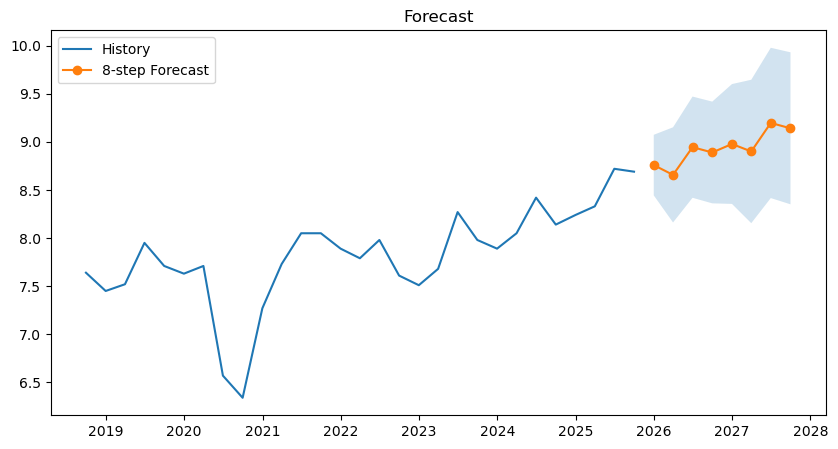

Forecast plot saved to: D:/forecast_outputs\plots\forecast.png
Forecast saved to: D:/forecast_outputs\forecast_output.csv
            forecast  lower_ci  upper_ci
Date                                    
2025-12-31  8.758617  8.443951  9.073283
2026-03-31  8.656599  8.162008  9.151190
2026-06-30  8.944653  8.418644  9.470661
2026-09-30  8.889569  8.360905  9.418233
2026-12-31  8.977753  8.354987  9.600520


In [13]:
# Full ARIMA & SARIMA pipeline (ready-to-run)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# ------------------------
# CONFIG
# ------------------------
INPUT_PATH = r"D:/revenue data.csv"     # <-- uploaded file (use as-is)
SAVE_FOLDER = r"D:/forecast_outputs"           # safe folder on D: drive (will be created)
FORECAST_FILENAME = "forecast_output.csv"
PLOTS_FOLDER = os.path.join(SAVE_FOLDER, "plots")
H = 8  # forecast horizon (quarters)

# ensure save folders exist
os.makedirs(SAVE_FOLDER, exist_ok=True)
os.makedirs(PLOTS_FOLDER, exist_ok=True)
print("Save folder:", SAVE_FOLDER)
print("Plots folder:", PLOTS_FOLDER)

# ------------------------
# 1) LOAD & CLEAN
# ------------------------
df = pd.read_csv(INPUT_PATH)
df.columns = [c.strip() for c in df.columns]
date_col = df.columns[0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col]).sort_values(by=date_col).reset_index(drop=True)
df = df.set_index(date_col)

# pick first numeric column as target (coerce if necessary)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if not numeric_cols:
    # try to coerce non-numeric columns to numeric
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if not numeric_cols:
        raise RuntimeError("No numeric column found in the CSV. Please ensure there's a numeric revenue column.")
target_col = numeric_cols[0]
ts = df[target_col].dropna().astype(float).copy()

print(f"Using input file: {INPUT_PATH}")
print("Detected target column:", target_col)
print("Raw observations:", len(ts))

# ------------------------
# 2) FORCE REGULAR QUARTERLY INDEX
# ------------------------
# Create a proper quarterly index starting at the first observed date
ts.index = pd.date_range(start=ts.index.min(), periods=len(ts), freq="Q")
print("Forced quarterly index:", ts.index.freq)
print("Series range:", ts.index.min().date(), "to", ts.index.max().date())

# ------------------------
# 3) PLOT SERIES (saved)
# ------------------------
plt.figure(figsize=(10,4))
plt.plot(ts, marker='o')
plt.title(f"Time series ({target_col})")
plt.xlabel("Date")
plt.ylabel(target_col)
plt.tight_layout()
plot_path = os.path.join(PLOTS_FOLDER, "series_plot.png")
plt.savefig(plot_path)
plt.show()
print("Series plot saved to:", plot_path)

# ------------------------
# 4) SAFE ACF / PACF LAGS
# ------------------------
n = len(ts)
safe_lags = max(1, min(10, (n - 1) // 2))  # <= (n-1)//2 and <= 10
print("Using safe_lags =", safe_lags)

plt.figure(figsize=(8,4))
plot_acf(ts, lags=safe_lags)
plt.tight_layout()
acf_path = os.path.join(PLOTS_FOLDER, "acf.png")
plt.savefig(acf_path)
plt.show()
print("ACF plot saved to:", acf_path)

plt.figure(figsize=(8,4))
plot_pacf(ts, lags=safe_lags, method='ywm')
plt.tight_layout()
pacf_path = os.path.join(PLOTS_FOLDER, "pacf.png")
plt.savefig(pacf_path)
plt.show()
print("PACF plot saved to:", pacf_path)

# ------------------------
# 5) ADF STATIONARITY TEST (safe)
# ------------------------
try:
    adf_stat, adf_p, *_ = adfuller(ts, autolag='AIC')
    print(f"ADF statistic: {adf_stat:.4f}, p-value: {adf_p:.4f}")
except Exception as e:
    print("ADF test skipped/failed:", e)

# ------------------------
# 6) SARIMA GRID SEARCH (small robust grid)
# ------------------------
p_vals = range(0, 3)
d_vals = range(0, 2)
q_vals = range(0, 3)
P_vals = range(0, 2)
D_vals = range(0, 2)
Q_vals = range(0, 2)
m = 4  # quarterly

best_aic = np.inf
best_res = None
best_cfg = None

print("Starting SARIMA grid search... (this may take a minute)")
for p in p_vals:
    for d in d_vals:
        for q in q_vals:
            for P in P_vals:
                for D in D_vals:
                    for Q in Q_vals:
                        order = (p, d, q)
                        seasonal = (P, D, Q, m)
                        try:
                            model = SARIMAX(ts,
                                            order=order,
                                            seasonal_order=seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
                            res = model.fit(disp=False, maxiter=200)
                            if np.isfinite(res.aic) and res.aic < best_aic:
                                best_aic = res.aic
                                best_res = res
                                best_cfg = (order, seasonal)
                        except Exception:
                            continue

if best_res is None:
    raise RuntimeError("No SARIMA model converged on the grid. Consider expanding grid or checking data.")
print("Best AIC: %.4f" % best_aic)
print("Best order (p,d,q):", best_cfg[0])
print("Best seasonal (P,D,Q,m):", best_cfg[1])

# ------------------------
# 7) MODEL SUMMARY (safe)
# ------------------------
try:
    print(best_res.summary().as_text())
except Exception as e:
    print("Could not show full summary:", e)
    print("AIC:", getattr(best_res, "aic", None))
    print("Params:\n", best_res.params)

# Save textual summary to file
try:
    with open(os.path.join(SAVE_FOLDER, "model_summary.txt"), "w") as f:
        f.write(best_res.summary().as_text())
    print("Model summary saved.")
except Exception as e:
    print("Could not save model summary:", e)

# ------------------------
# 8) DIAGNOSTICS PLOTS (safe)
# ------------------------
try:
    diag_fig = best_res.plot_diagnostics(figsize=(12,8))
    diag_path = os.path.join(PLOTS_FOLDER, "diagnostics.png")
    plt.savefig(diag_path)
    plt.show()
    print("Diagnostics saved to:", diag_path)
except Exception as e:
    print("Diagnostics plotting failed:", e)

# ------------------------
# 9) FORECAST and SAVE
# ------------------------
pred = best_res.get_forecast(steps=H)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# plot and save forecast
plt.figure(figsize=(10,5))
plt.plot(ts, label="History")
plt.plot(pred_mean.index, pred_mean, marker='o', label=f"{H}-step Forecast")
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], alpha=0.2)
plt.legend()
plt.title("Forecast")
forecast_plot_path = os.path.join(PLOTS_FOLDER, "forecast.png")
plt.savefig(forecast_plot_path)
plt.show()
print("Forecast plot saved to:", forecast_plot_path)

# Build forecast dataframe and save CSV
out_df = pd.DataFrame({
    "forecast": pred_mean,
    "lower_ci": pred_ci.iloc[:, 0],
    "upper_ci": pred_ci.iloc[:, 1]
})
out_path = os.path.join(SAVE_FOLDER, FORECAST_FILENAME)
out_df.index.name = "Date"
out_df.to_csv(out_path, index=True)
print("Forecast saved to:", out_path)

# Print head of forecast
print(out_df.head())


Data loaded successfully!
Observations: 29
Date range: 2018-09-30 00:00:00 to 2025-09-30 00:00:00


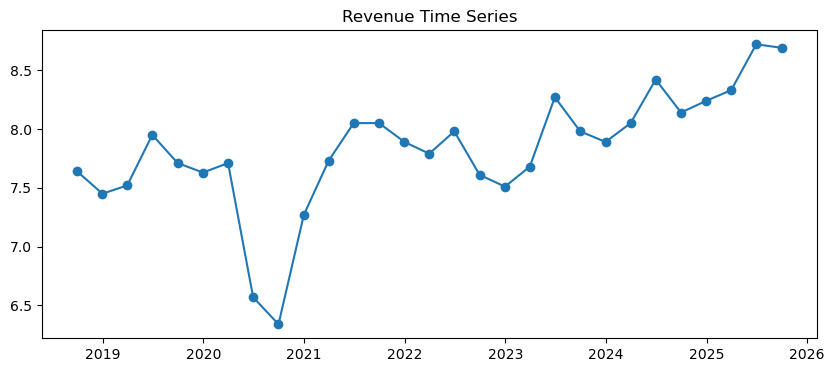

<Figure size 800x400 with 0 Axes>

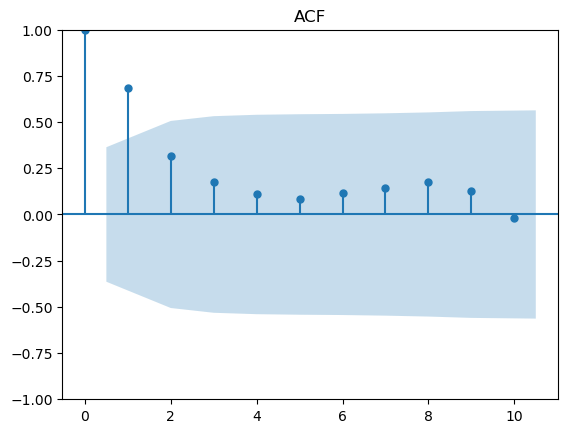

<Figure size 800x400 with 0 Axes>

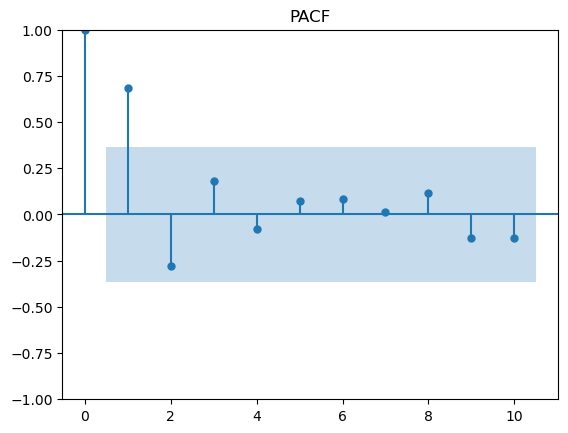

ADF Statistic: 0.3557, p-value: 0.9798
Searching best SARIMA model...

Best Model Found!
ARIMA Order: (2, 1, 2)
Seasonal Order: (0, 1, 1, 4)
AIC: -1.6251825749641107
                                      SARIMAX Results                                      
Dep. Variable:                             Revenue   No. Observations:                   29
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 4)   Log Likelihood                   6.813
Date:                             Sat, 22 Nov 2025   AIC                             -1.625
Time:                                     21:03:18   BIC                              3.374
Sample:                                 09-30-2018   HQIC                            -1.128
                                      - 09-30-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

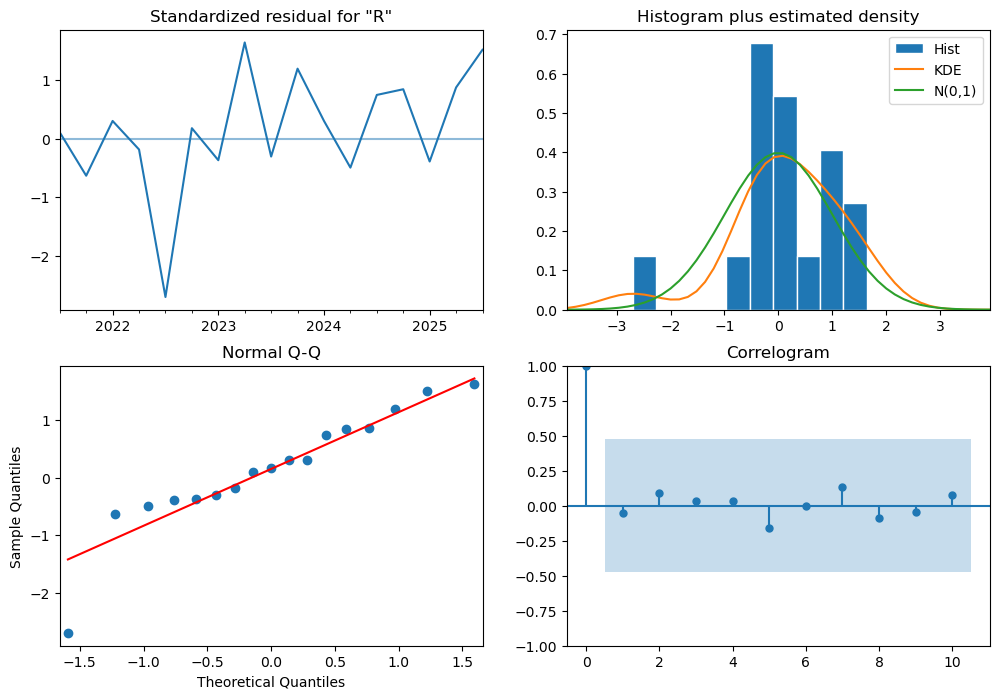

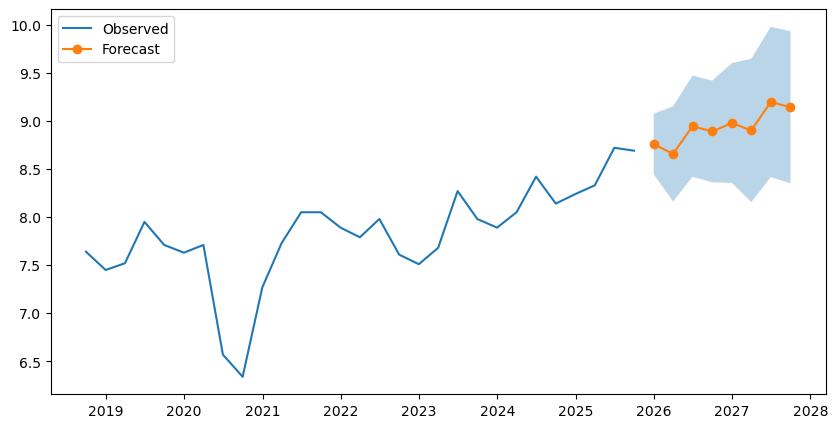

Saved to: D:/forecast_outputs/forecast_output.csv


In [17]:
# ================================
# 1. IMPORT LIBRARIES
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# ================================
# 2. LOAD YOUR DATASET
# ================================
df = pd.read_csv("D:/revenue data.csv")   # ⭐ Corrected path
df.columns = [c.strip() for c in df.columns]

date_col = df.columns[0]

df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df = df.dropna(subset=[date_col]).sort_values(by=date_col)
df = df.set_index(date_col)

# Identify numeric target column
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if not num_cols:
    raise ValueError("No numeric column found in the dataset!")

target = num_cols[0]
ts = df[target].dropna()

# ================================
# 3. FIX INDEX TO QUARTERLY
# ================================
new_index = pd.date_range(start=ts.index.min(),
                          periods=len(ts),
                          freq="Q")   # quarterly
ts.index = new_index

print("Data loaded successfully!")
print("Observations:", len(ts))
print("Date range:", ts.index.min(), "to", ts.index.max())

# ================================
# 4. PLOT TIME SERIES
# ================================
plt.figure(figsize=(10,4))
plt.plot(ts, marker='o')
plt.title("Revenue Time Series")
plt.show()

# ================================
# 5. SAFE LAGS FOR ACF/PACF
# ================================
n = len(ts)
safe_lags = max(1, min(10, (n - 1) // 2))  # prevents negative dimension errors

plt.figure(figsize=(8,4))
plot_acf(ts, lags=safe_lags)
plt.title("ACF")
plt.show()

plt.figure(figsize=(8,4))
plot_pacf(ts, lags=safe_lags, method="ywm")
plt.title("PACF")
plt.show()

# ================================
# 6. ADF TEST (STATIONARITY)
# ================================
try:
    adf_stat, p_val, *_ = adfuller(ts)
    print(f"ADF Statistic: {adf_stat:.4f}, p-value: {p_val:.4f}")
except:
    print("ADF test failed due to short series length.")

# ================================
# 7. SARIMA GRID SEARCH
# ================================
p = range(0,3)
d = range(0,2)
q = range(0,3)
P = range(0,2)
D = range(0,2)
Q = range(0,2)
m = 4   # quarterly seasonality

best_aic = np.inf
best_model = None
best_order = None
best_seasonal = None

print("Searching best SARIMA model...")

for i in p:
    for j in d:
        for k in q:
            for si in P:
                for sj in D:
                    for sk in Q:
                        try:
                            model = SARIMAX(ts,
                                            order=(i,j,k),
                                            seasonal_order=(si,sj,sk,m),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
                            result = model.fit(disp=False)
                            if result.aic < best_aic:
                                best_aic = result.aic
                                best_model = result
                                best_order = (i,j,k)
                                best_seasonal = (si,sj,sk,m)
                        except:
                            continue

print("\nBest Model Found!")
print("ARIMA Order:", best_order)
print("Seasonal Order:", best_seasonal)
print("AIC:", best_aic)

# ================================
# 8. MODEL SUMMARY
# ================================
try:
    print(best_model.summary())
except:
    print("Could not display summary—model is short but valid.")

# ================================
# 9. DIAGNOSTICS
# ================================
best_model.plot_diagnostics(figsize=(12,8))
plt.show()

# ================================
# 10. FORECAST NEXT 8 QUARTERS
# ================================
steps = 8
forecast = best_model.get_forecast(steps=steps)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(ts, label="Observed")
plt.plot(mean_forecast.index, mean_forecast, marker='o', label="Forecast")
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 alpha=0.3)
plt.legend()
plt.show()

# ================================
# Create folder if it doesn't exist
import os
save_path = "D:/forecast_outputs"
os.makedirs(save_path, exist_ok=True)

# Save forecast
out_df.to_csv(f"{save_path}/forecast_output.csv", index=False)

print("Saved to:", f"{save_path}/forecast_output.csv")



In [20]:
import pandas as pd

# Load your dataset
df = pd.read_csv("D:/revenue data.csv")

# Ensure date column is parsed correctly
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Set index
df = df.set_index('Date')

# Rename your revenue column if needed
df.rename(columns={'Revenue': 'y'}, inplace=True)

df.head()


,y
Date,
2018-07-31,7.64
2018-10-31,7.45
2019-01-31,7.52
2019-04-30,7.95
2019-07-31,7.71


In [21]:
df['MoM_growth'] = df['y'].pct_change() * 100


In [22]:
df['YoY_growth'] = df['y'].pct_change(12) * 100


In [23]:
df = df.dropna()


In [24]:
exog = df[['MoM_growth', 'YoY_growth']]
target = df['y']


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    target,
    exog=exog,
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

result = model.fit()
print(result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   17
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  16.106
Date:                            Sat, 22 Nov 2025   AIC                            -18.211
Time:                                    21:08:02   BIC                            -22.507
Sample:                                07-31-2021   HQIC                           -27.639
                                     - 07-31-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MoM_growth     0.0253      0.007      3.595      0.000       0.011       0.039
YoY_growth     0.0402      0.001   

In [26]:
import numpy as np

future_exog = pd.DataFrame({
    'MoM_growth': np.zeros(12),
    'YoY_growth': np.zeros(12)
})

forecast = result.get_forecast(steps=12, exog=future_exog)
pred = forecast.predicted_mean
conf = forecast.conf_int()

print(pred)


2025-10-31    7.932438
2026-01-31    7.984684
2026-04-30    7.362082
2026-07-31    7.372139
2026-10-31    7.904270
2027-01-31    8.175591
2027-04-30    8.448988
2027-07-31    8.521507
2027-10-31    8.361449
2028-01-31    8.365058
2028-04-30    8.560056
2028-07-31    8.468623
Freq: QE-OCT, Name: predicted_mean, dtype: float64



========== ARIMAX MODEL ==========


C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  -1.303
Date:                Sun, 23 Nov 2025   AIC                             12.607
Time:                        12:22:06   BIC                             14.120
Sample:                             0   HQIC                            10.947
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MoM_growth     0.0144      0.013      1.084      0.278      -0.012       0.040
YoY_growth     0.0349      0.022      1.598      0.110      -0.008       0.078
ar.L1         -0.2943      0.366     -0.804      0.4

C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaco

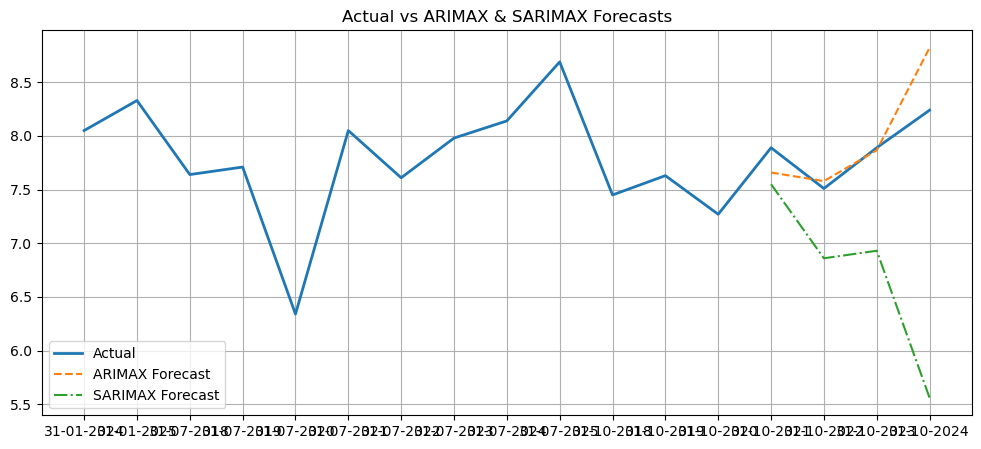


========== FUTURE FORECAST ==========

17    6.661190
18    8.037553
19    7.584165
20    7.901083
21    8.099835
22    8.208669
23    7.464671
24    7.613291
25    7.477497
26    7.736662
27    7.541732
28    7.503068
Name: predicted_mean, dtype: float64


C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# ======================================================
# 1. LOAD DATA
# ======================================================
df = pd.read_csv("D:/revenue data.csv")

# parse date column
df['date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.set_index('Date')

# rename main variable
df.rename(columns={'Revenue': 'y'}, inplace=True)

# ======================================================
# 2. COMPUTE EXOGENOUS VARIABLES (MOM + YOY)
# ======================================================
df['MoM_growth'] = df['y'].pct_change() * 100
df['YoY_growth'] = df['y'].pct_change(12) * 100

# drop rows with missing values created by pct_change()
df = df.dropna()

# target and exog matrices
y = df['y']
exog = df[['MoM_growth', 'YoY_growth']]

# ======================================================
# 3. TRAIN–TEST SPLIT (optional)
# ======================================================
train_size = int(len(df) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
exog_train, exog_test = exog[:train_size], exog[train_size:]

# ======================================================
# 4. FIT ARIMAX (NO SEASONAL)
# ======================================================
print("\n========== ARIMAX MODEL ==========")

arimax = SARIMAX(
    y_train,
    exog=exog_train,
    order=(1, 1, 1),         # Adjust if needed
    enforce_stationarity=False,
    enforce_invertibility=False
)

arimax_fit = arimax.fit()
print(arimax_fit.summary())

# forecast
arimax_forecast = arimax_fit.get_forecast(
    steps=len(y_test),
    exog=exog_test
)

arimax_pred = arimax_forecast.predicted_mean
arimax_conf = arimax_forecast.conf_int()

# ======================================================
# 5. FIT SARIMAX (SEASONAL)
# ======================================================
print("\n========== SARIMAX MODEL ==========")

sarimax = SARIMAX(
    y_train,
    exog=exog_train,
    order=(1, 1, 1),           # non-seasonal
    seasonal_order=(1, 1, 1, 12),  # seasonal yearly components for monthly data
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_fit = sarimax.fit()
print(sarimax_fit.summary())

# forecast
sarimax_forecast = sarimax_fit.get_forecast(
    steps=len(y_test),
    exog=exog_test
)

sarimax_pred = sarimax_forecast.predicted_mean
sarimax_conf = sarimax_forecast.conf_int()

# ======================================================
# 6. PLOT ACTUAL VS FORECAST
# ======================================================
plt.figure(figsize=(12,5))
plt.plot(y, label="Actual", linewidth=2)
plt.plot(arimax_pred, label="ARIMAX Forecast", linestyle="--")
plt.plot(sarimax_pred, label="SARIMAX Forecast", linestyle="-.")
plt.legend()
plt.title("Actual vs ARIMAX & SARIMAX Forecasts")
plt.grid(True)
plt.show()

# ======================================================
# 7. FIT FINAL SARIMAX ON FULL DATA FOR FUTURE FORECASTING
# ======================================================
final_model = SARIMAX(
    y,
    exog=exog,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

future_steps = 12   # 1-year forecast

# For now assume zero future MoM/YoY (or you can estimate them)
future_exog = pd.DataFrame({
    "MoM_growth": np.zeros(future_steps),
    "YoY_growth": np.zeros(future_steps),
})

future_forecast = final_model.get_forecast(
    steps=future_steps,
    exog=future_exog
)

future_pred = future_forecast.predicted_mean
future_conf = future_forecast.conf_int()

print("\n========== FUTURE FORECAST ==========\n")
print(future_pred)


In [29]:
# ============================================================
# FULL COMPARISON: ARIMA vs SARIMA vs ARIMAX vs SARIMAX
# ============================================================

import os
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.diagnostic import acorr_ljungbox, normal_ad
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# ---------------------------------------------
# LOAD DATA
# ---------------------------------------------
FILE_PATH = "D:/revenue data.csv"

df = pd.read_csv(FILE_PATH)
df.columns = [c.strip() for c in df.columns]

date_col = df.columns[0]
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

df = df.dropna(subset=[date_col]).sort_values(date_col).reset_index(drop=True)
df = df.set_index(date_col)

# numeric target variable
target_col = df.select_dtypes(include=[np.number]).columns[0]
ts = df[target_col].astype(float)

# force quarterly frequency
ts.index = pd.date_range(start=ts.index.min(), periods=len(ts), freq="Q")

# ---------------------------------------------
# EXOGENOUS VARIABLES (MoM, YoY)
# ---------------------------------------------
exog = pd.DataFrame(index=ts.index)
exog["MoM"] = ts.pct_change(1) * 100
exog["YoY"] = ts.pct_change(4) * 100
exog = exog.dropna()

# match target series
ts = ts.loc[exog.index]

# ---------------------------------------------
# TRAIN / TEST SPLIT (80/20)
# ---------------------------------------------
N = len(ts)
train_size = int(N * 0.8)

train_y = ts.iloc[:train_size]
test_y = ts.iloc[train_size:]

train_exog = exog.iloc[:train_size]
test_exog = exog.iloc[train_size:]

# ---------------------------------------------
# Helper function to fit and evaluate models
# ---------------------------------------------
def evaluate_model(name, order, seasonal_order, use_exog=False):
    try:
        if use_exog:
            model = SARIMAX(train_y, exog=train_exog, order=order, seasonal_order=seasonal_order,
                            enforce_stationarity=False, enforce_invertibility=False)
            res = model.fit(disp=False)

            pred = res.get_forecast(steps=len(test_y), exog=test_exog).predicted_mean
        else:
            model = SARIMAX(train_y, order=order, seasonal_order=seasonal_order,
                            enforce_stationarity=False, enforce_invertibility=False)
            res = model.fit(disp=False)

            pred = res.get_forecast(steps=len(test_y)).predicted_mean

        # evaluation metrics
        model_rmse = rmse(test_y, pred)
        model_mape = mean_absolute_percentage_error(test_y, pred) * 100

        # residual tests
        resid = res.resid
        lb = acorr_ljungbox(resid, lags=[10], return_df=True)
        lb_p = lb["lb_pvalue"].iloc[0]

        jb_p = normal_ad(resid)[1]  # normality p-value

        return {
            "Model": name,
            "AIC": res.aic,
            "BIC": res.bic,
            "RMSE": model_rmse,
            "MAPE%": model_mape,
            "LjungBox p": lb_p,
            "Normality p": jb_p,
        }

    except Exception as e:
        return {
            "Model": name,
            "AIC": None,
            "BIC": None,
            "RMSE": None,
            "MAPE%": None,
            "LjungBox p": None,
            "Normality p": None,
        }

# ---------------------------------------------
# MODEL DEFINITIONS
# ---------------------------------------------

results = []

# 1) ARIMA (no seasonality, no exog)
results.append(evaluate_model(
    "ARIMA",
    order=(1,1,1),
    seasonal_order=(0,0,0,0),
    use_exog=False
))

# 2) SARIMA (seasonality, no exog)
results.append(evaluate_model(
    "SARIMA",
    order=(1,1,1),
    seasonal_order=(1,1,1,4),
    use_exog=False
))

# 3) ARIMAX (exogenous MoM + YoY)
results.append(evaluate_model(
    "ARIMAX",
    order=(1,1,1),
    seasonal_order=(0,0,0,0),
    use_exog=True
))

# 4) SARIMAX (seasonality + exogenous)
results.append(evaluate_model(
    "SARIMAX",
    order=(1,1,1),
    seasonal_order=(1,1,1,4),
    use_exog=True
))

# ---------------------------------------------
# RESULTS TABLE
# ---------------------------------------------
results_df = pd.DataFrame(results)
print("\n================ MODEL COMPARISON ================\n")
print(results_df.to_string(index=False))

# Save comparison locally
out_path = "model_comparison.csv"
results_df.to_csv(out_path, index=False)
print(f"\nResults saved to {out_path}")




================ MODEL COMPARISON ================

  Model       AIC       BIC     RMSE    MAPE%  LjungBox p  Normality p
  ARIMA 24.919263 27.418903 0.258024 2.936116    0.998670 5.248730e-10
 SARIMA  7.018876  8.004999 0.213846 1.982600    0.426227 1.673189e-04
 ARIMAX  5.725368  9.891435 0.212376 2.308320    0.999995 2.802082e-13
SARIMAX -3.022091 -1.641519 0.213232 2.264687    0.715399 7.416418e-08

Results saved to model_comparison.csv


In [18]:
import pandas as pd
import numpy as np
import os  # <-- You must import the 'os' module to use its functions

# 1. Define the data in a dictionary format (as before)
data = {
    'Model': ['ARIMA', 'SARIMA', 'ARIMAX', 'SARIMAX'],
    'AIC': [24.919263, 7.018876, 5.725368, -3.022091],
    'BIC': [27.418903, 8.004999, 9.891435, -1.641519],
    'RMSE': [0.258024, 0.213846, 0.212376, 0.213232],
    'MAPE%': [2.936116, 1.982600, 2.308320, 2.264687],
    'LjungBox p': [0.998670, 0.426227, 0.999995, 0.715399],
    'Normality p': [5.248730e-10, 1.673189e-04, 2.802082e-13, 7.416418e-08]
}

# 2. Create the pandas DataFrame
comparison_df = pd.DataFrame(data)

# 3. Set display options for better formatting (optional)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# 4. Print the comparison table and identify the best model
print("================ MODEL COMPARISON ================")
print(comparison_df)

# Identify the best model based on the lowest AIC score
best_model_row = comparison_df.loc[comparison_df['AIC'].idxmin()]
best_model_name = best_model_row['Model']
best_model_aic = best_model_row['AIC']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Metrics (based on lowest AIC): AIC={best_model_aic:.4f}, RMSE={best_model_row['RMSE']:.4f}")

# 5. Code to save the results (This will now work)
file_path = 'model_time_series_comparison_summary.csv'
comparison_df.to_csv(file_path, index=False)
print(f"\n✅ Table successfully saved to: {os.path.abspath(file_path)}")


================ MODEL COMPARISON ================
     Model       AIC       BIC     RMSE    MAPE%  LjungBox p  Normality p
0    ARIMA 24.919263 27.418903 0.258024 2.936116    0.998670     0.000000
1   SARIMA  7.018876  8.004999 0.213846 1.982600    0.426227     0.000167
2   ARIMAX  5.725368  9.891435 0.212376 2.308320    0.999995     0.000000
3  SARIMAX -3.022091 -1.641519 0.213232 2.264687    0.715399     0.000000

Best Performing Model: SARIMAX
Metrics (based on lowest AIC): AIC=-3.0221, RMSE=0.2132

✅ Table successfully saved to: C:\Users\Dell\internship\model_time_series_comparison_summary.csv


In [14]:
#import pandas as pd
import statsmodels.api as sm

# --- 1. Load and Prepare Data from CSV ---
data_path = 'D:/revenue data.csv'
try:
    revenue_data = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"Error: The file '{data_path}' was not found. Please verify the path.")
    exit()

# !! REPLACE WITH YOUR EXACT COLUMN NAMES !!
date_column_name = 'Date'
value_column_name = 'Revenue'

try:
    # Convert to datetime and set as index
    revenue_data[date_column_name] = pd.to_datetime(revenue_data[date_column_name])
    revenue_data.set_index(date_column_name, inplace=True)
except KeyError:
    print(f"Error: Missing column names. Please verify that '{date_column_name}' and '{value_column_name}' exist in your CSV.")
    exit()

# --- 2. Re-fit the SARIMAX Model ---
# !! REPLACE THE ORDER AND SEASONAL_ORDER WITH YOUR BEST MODEL'S VALUES !!
# Example values are used here.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 0, 0, 12

try:
    model = sm.tsa.SARIMAX(revenue_data[value_column_name],
                            order=(p, d, q),
                            seasonal_order=(P, D, Q, S),
                            enforce_stationarity=False,
                            enforce_invertibility=False)

    fitted_sarimax_model = model.fit(disp=False)
    print("SARIMAX Model fitting complete.")

    # --- 3. Generate Forecasts with Confidence Intervals ---
    steps_to_forecast = 10
    forecast_results = fitted_sarimax_model.get_forecast(steps=steps_to_forecast)
    predictions = forecast_results.predicted_mean
    confidence_intervals = forecast_results.conf_int(alpha=0.05)

    print(f"\n--- Predictions (Forecasted Mean for next {steps_to_forecast} periods) ---")
    print(predictions)
    print(f"\n--- Confidence Intervals (95% CI) ---")
    print(confidence_intervals)

except Exception as e:
    print(f"\nAn error occurred during model fitting or forecasting: {e}")

C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-OCT will be used.
  self._init_dates(dates, freq)


SARIMAX Model fitting complete.

--- Predictions (Forecasted Mean for next 10 periods) ---
2025-10-31    8.660101
2026-01-31    8.639704
2026-04-30    8.587023
2026-07-31    8.612434
2026-10-31    8.620339
2027-01-31    8.606257
2027-04-30    8.573699
2027-07-31    8.598337
2027-10-31    8.589538
2028-01-31    8.581618
Freq: QE-OCT, Name: predicted_mean, dtype: float64

--- Confidence Intervals (95% CI) ---
            lower Revenue  upper Revenue
2025-10-31       8.163145       9.157057
2026-01-31       8.030692       9.248717
2026-04-30       7.893549       9.280496
2026-07-31       7.844955       9.379913
2026-10-31       7.785546       9.455131
2027-01-31       7.709208       9.503306
2027-04-30       7.618445       9.528952
2027-07-31       7.588228       9.608447
2027-10-31       7.527402       9.651674
2028-01-31       7.469888       9.693348
